In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample,shuffle
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
#lazy classifier python

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 270


In [49]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,508077,Male,39,1,28.0,0,1-2 Year,Yes,33670.0,124.0,133,1
1,116379,Male,60,1,9.0,1,1-2 Year,Yes,32660.0,26.0,64,0
2,24159,Female,20,1,43.0,0,< 1 Year,No,2630.0,160.0,283,0
3,129481,Female,22,1,47.0,0,< 1 Year,Yes,32665.0,26.0,42,0
4,469280,Male,25,1,28.0,1,< 1 Year,No,21602.0,152.0,293,0


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244578 entries, 0 to 244577
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    244578 non-null  int64  
 1   Gender                244578 non-null  object 
 2   Age                   244578 non-null  int64  
 3   Driving_License       244578 non-null  int64  
 4   Region_Code           244578 non-null  float64
 5   Previously_Insured    244578 non-null  int64  
 6   Vehicle_Age           244578 non-null  object 
 7   Vehicle_Damage        244578 non-null  object 
 8   Annual_Premium        244578 non-null  float64
 9   Policy_Sales_Channel  244578 non-null  float64
 10  Vintage               244578 non-null  int64  
 11  Response              244578 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 22.4+ MB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61145 entries, 0 to 61144
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    61145 non-null  int64  
 1   Gender                61145 non-null  object 
 2   Age                   61145 non-null  int64  
 3   Driving_License       61145 non-null  int64  
 4   Region_Code           61145 non-null  float64
 5   Previously_Insured    61145 non-null  int64  
 6   Vehicle_Age           61145 non-null  object 
 7   Vehicle_Damage        61145 non-null  object 
 8   Annual_Premium        61145 non-null  float64
 9   Policy_Sales_Channel  61145 non-null  float64
 10  Vintage               61145 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 5.1+ MB


In [52]:
train['id']

0         508077
1         116379
2          24159
3         129481
4         469280
           ...  
244573    218753
244574    318355
244575    300598
244576      8591
244577    174900
Name: id, Length: 244578, dtype: int64

In [53]:
# train.drop('id',axis=1,inplace=True)
# y = train.Response
# test_id = test['id']
# test.drop("id", axis = 1, inplace = True)

In [54]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000,244578.000000
mean,234645.165109,38.516400,0.998091,26.407007,0.489713,30705.566331,111.942566,154.291228,0.163617
std,139466.538310,15.221267,0.043655,13.179890,0.499895,16994.006743,54.304292,83.667275,0.369928
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115277.000000,25.000000,1.000000,15.000000,0.000000,24560.000000,26.000000,82.000000,0.000000
50%,230961.500000,36.000000,1.000000,28.000000,0.000000,31688.000000,147.000000,154.000000,0.000000
75%,345559.750000,49.000000,1.000000,35.000000,1.000000,39424.000000,152.000000,227.000000,0.000000
max,508144.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Univariate

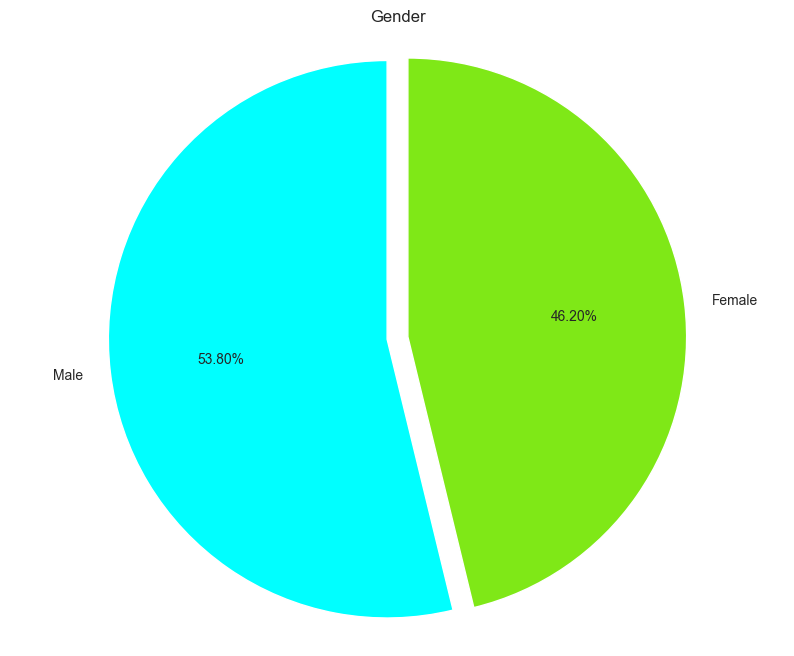

In [55]:
plt.figure(figsize=(10,8))
plt.pie(train.Gender.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#00FFFF','#7FE817'],radius=4,labels=['Male','Female'])
plt.title('Gender')
plt.axis('equal')
plt.show()

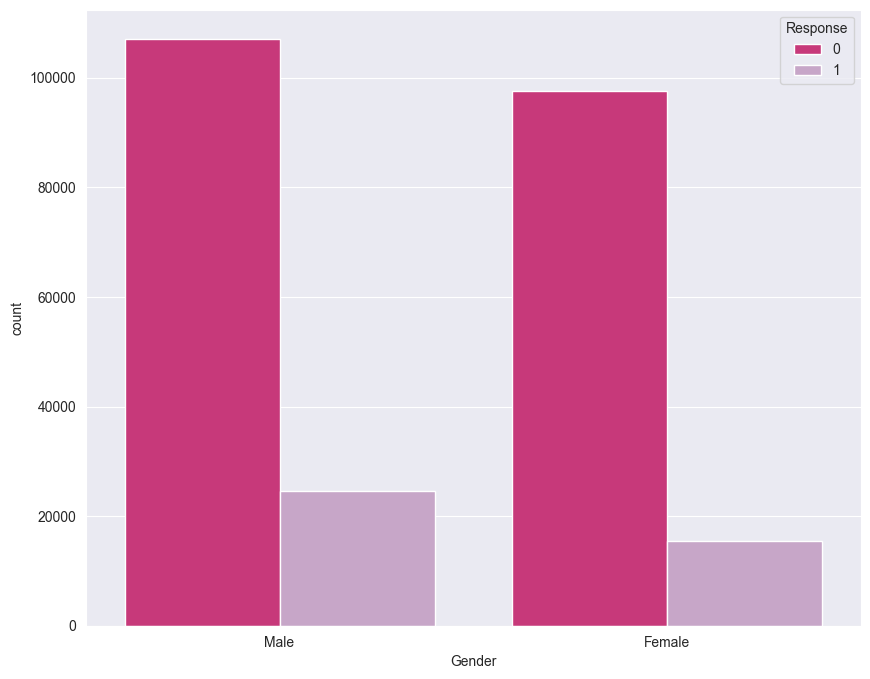

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x=train.Gender,hue=train.Response,palette='PuRd_r')
plt.show()

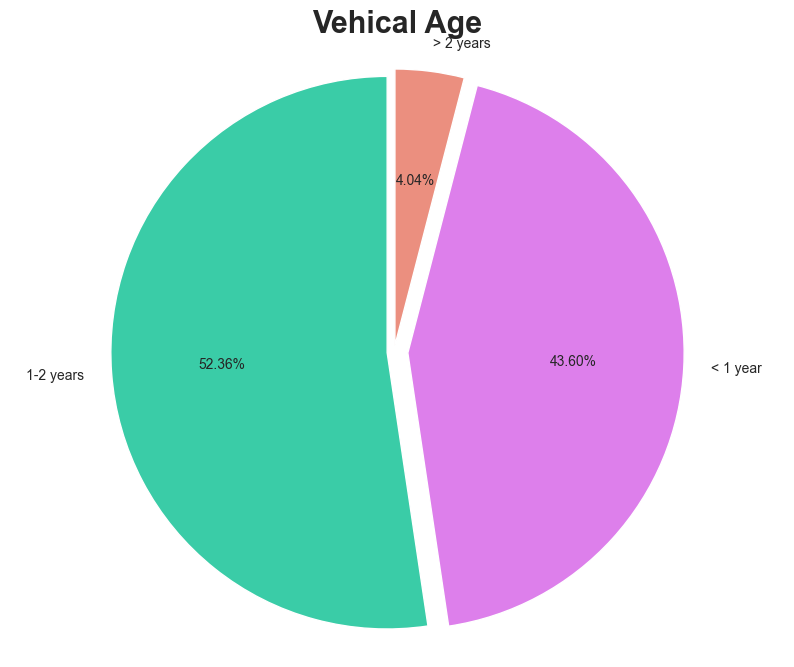

In [57]:
plt.figure(figsize=(10,8))
plt.pie(train.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%',radius=4,colors=['#3ACCA7','#DD7FEB','#EB8F7F'],labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

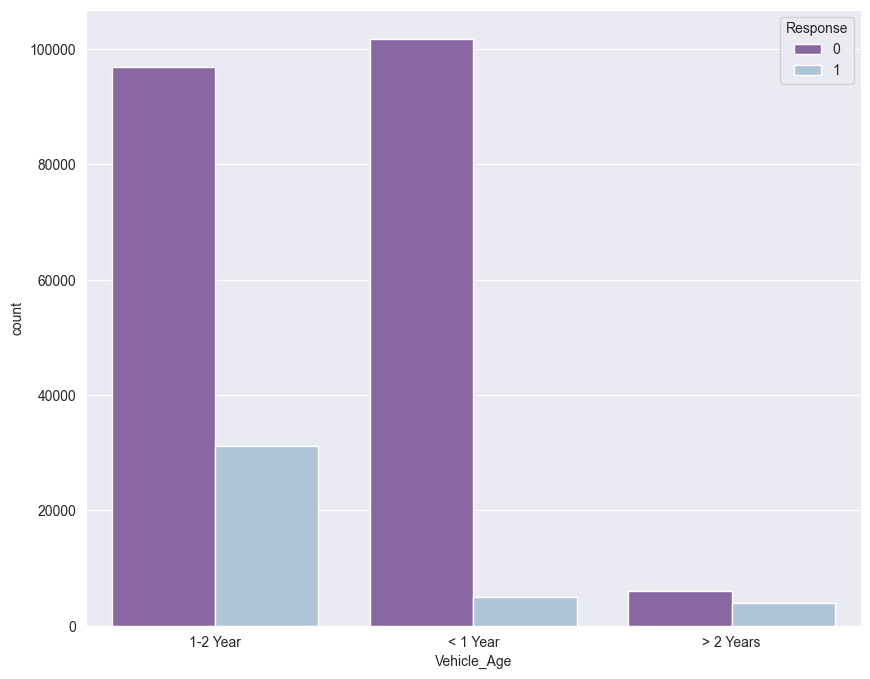

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(x=train.Vehicle_Age,hue=train.Response,palette='BuPu_r')
plt.show()

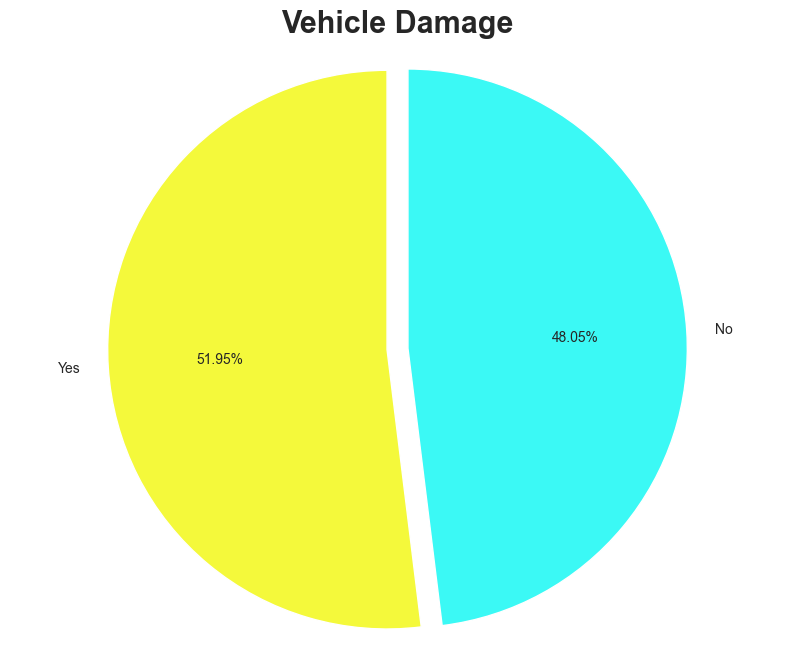

In [59]:
plt.figure(figsize=(10,8))
plt.pie(train.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#F4F93B','#3BF9F5'],radius=4,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

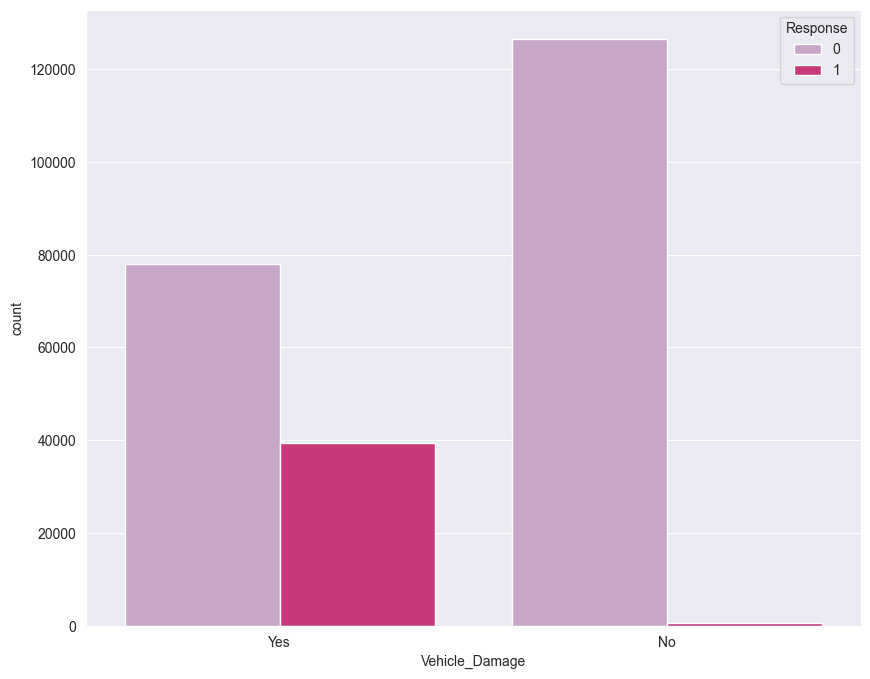

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(x=train.Vehicle_Damage,hue=train.Response,palette='PuRd')
plt.show()

E:\AI\tahaluf al emarat technical solutions\Vehicle Insurance Classification\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
E:\AI\tahaluf al emarat technical solutions\Vehicle Insurance Classification\venv\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


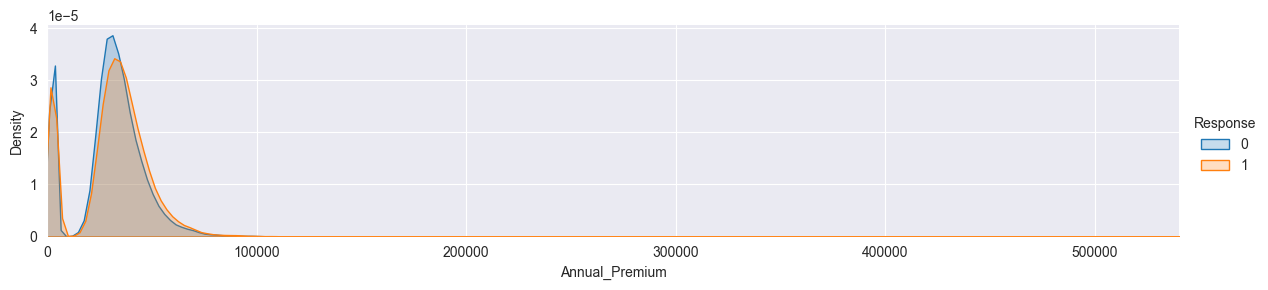

In [61]:
facetgrid = sns.FacetGrid(train,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Annual_Premium",shade = True)
facetgrid.set(xlim = (0,train["Annual_Premium"].max()))
facetgrid.add_legend()

C:\Users\User\AppData\Local\Temp\ipykernel_13624\1406656605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

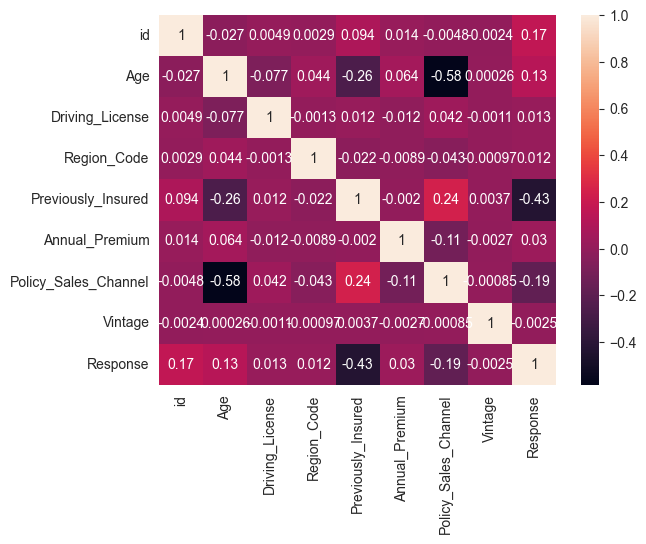

In [62]:
corr = train.corr()
sns.heatmap(corr,annot=True)

In [63]:
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,112990
1,Male,131588


In [64]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,96877
1,1-2 Year,1,31184
2,< 1 Year,0,101754
3,< 1 Year,1,4880
4,> 2 Years,0,5930
5,> 2 Years,1,3953


<Axes: xlabel='Gender', ylabel='count'>

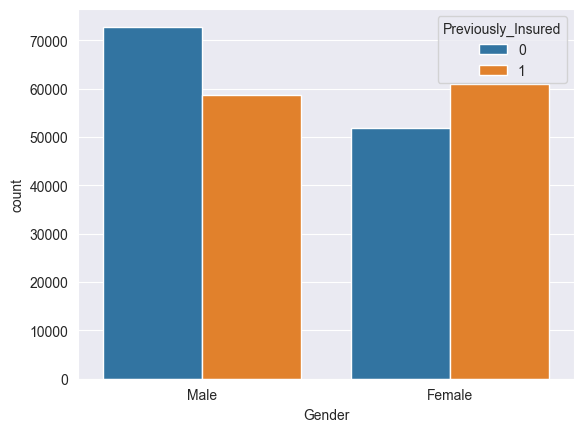

In [65]:
sns.countplot(data=train,x='Gender',hue='Previously_Insured')

<Axes: xlabel='Vehicle_Age', ylabel='count'>

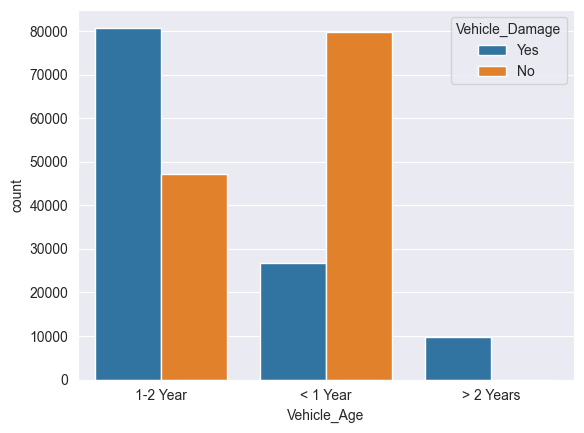

In [66]:
sns.countplot(data=train,x='Vehicle_Age',hue='Vehicle_Damage')

In [67]:
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,112990
1,Male,131588


In [68]:
df = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,96877
1,1-2 Year,1,31184
2,< 1 Year,0,101754
3,< 1 Year,1,4880
4,> 2 Years,0,5930
5,> 2 Years,1,3953


In [69]:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1}).astype('int')
test['Gender'] = test['Gender'].map({'Female': 0, 'Male': 1}).astype('int')
#train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map({'No':0,'Yes':1}).astype('int')
le = LabelEncoder()
vehicle_age_train = le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Age'] = vehicle_age_train
vehicle_age_test = le.fit_transform(test['Vehicle_Age'])
test['Vehicle_Age'] = vehicle_age_test
vehicle_dam_train = le.fit_transform(train['Vehicle_Damage'])
train['Vehicle_Damage'] = vehicle_age_train
vehicle_dam_test = le.fit_transform(test['Vehicle_Damage'])
test['Vehicle_Damage'] = vehicle_dam_test

In [70]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,508077,1,39,1,28.0,0,0,0,33670.0,124.0,133,1
1,116379,1,60,1,9.0,1,0,0,32660.0,26.0,64,0
2,24159,0,20,1,43.0,0,1,1,2630.0,160.0,283,0
3,129481,0,22,1,47.0,0,1,1,32665.0,26.0,42,0
4,469280,1,25,1,28.0,1,1,1,21602.0,152.0,293,0


In [71]:
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Response'], dtype='object')

In [72]:
y = train.Response
X = train.drop(['id','Vintage','Response'],axis=1)
test_id = test['id']
test.drop("id", axis = 1, inplace = True)

In [73]:
corr_y = train.corrwith(y)
corr_y

id                      0.166912
Gender                  0.066664
Age                     0.134113
Driving_License         0.012509
Region_Code             0.011973
Previously_Insured     -0.431362
Vehicle_Age            -0.151781
Vehicle_Damage         -0.151781
Annual_Premium          0.030203
Policy_Sales_Channel   -0.185760
Vintage                -0.002499
Response                1.000000
dtype: float64

In [74]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [75]:
df = pd.concat([X_train,y_train],axis=1)
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

0    163691
1    163691
Name: Response, dtype: int64

In [76]:
balanced_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
110686,1,22,1,29.0,1,1,1,30744.0,152.0,0
53522,1,65,1,11.0,0,2,2,39745.0,26.0,1
186507,0,25,1,46.0,0,1,1,28759.0,160.0,0
26268,0,23,1,29.0,1,1,1,36732.0,152.0,0
195665,1,45,1,28.0,1,0,0,39468.0,26.0,0


In [77]:
X_train = balanced_df.iloc[:,:-1]
y_train = balanced_df.iloc[:,-1]

In [78]:
xgb = XGBClassifier(learning_rate=0.1,
                    max_depth=4,
                    gamma=0.6,
                    colsample_bytree=0.7,
                    scale_pos_weight=1,
                    random_state=42)

In [79]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [80]:
pred = xgb.predict(X_test)
print('F1 score :',f1_score(y_test,pred))

F1 score : 0.5625429815847788


In [81]:
final_predictions= xgb.predict(test.drop('Vintage',axis=1))
submission = pd.concat([test_id,pd.Series(final_predictions,name="Response")],axis=1)
print(submission)
submission.to_csv("xgb3_with_resampling.csv",index=False,header=True)

           id  Response
0      380337         0
1       60095         0
2      491957         1
3       42481         1
4       25992         0
...       ...       ...
61140  287750         1
61141   80519         0
61142  314520         1
61143   60089         0
61144  110405         1

[61145 rows x 2 columns]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     40870
           1       0.41      0.91      0.56      8046

    accuracy                           0.77     48916
   macro avg       0.69      0.83      0.70     48916
weighted avg       0.88      0.77      0.79     48916



In [89]:
random_forest = RandomForestClassifier(n_estimators=1000
                                       ,max_depth=3
                                       ,random_state=40)

In [90]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=40)

In [91]:
pred_forest = random_forest.predict(X_test)
print('F1 score :',f1_score(y_test,pred_forest))

F1 score : 0.5333098962910882


In [92]:
print(classification_report(y_test,pred_forest))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     40870
           1       0.37      0.94      0.53      8046

    accuracy                           0.73     48916
   macro avg       0.68      0.81      0.67     48916
weighted avg       0.88      0.73      0.76     48916



In [87]:
final_predictions= xgb.predict(test.drop('Vintage',axis=1))
submission = pd.concat([test_id,pd.Series(final_predictions,name="Response")],axis=1)
print(submission)
submission.to_csv("randomforest_with_resampling.csv",index=False,header=True)

           id  Response
0      380337         0
1       60095         0
2      491957         1
3       42481         1
4       25992         0
...       ...       ...
61140  287750         1
61141   80519         0
61142  314520         1
61143   60089         0
61144  110405         1

[61145 rows x 2 columns]
